In [82]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.special import softmax

In [2]:
with open('results.pkl', 'rb') as f:
    results = pickle.load(f)

In [53]:
def score_probs(probs):
    end_idx = np.where(np.argmax(probs,-1)==1)[0][0]
    real_probs = np.max(softmax(probs[:end_idx],-1), -1)
    return min(real_probs)

In [55]:
scores = []
for result in results:
    scores.append(score_probs(result[4]))

In [63]:
df = pd.DataFrame([x[:4] for x in results], columns=['hid', 'sent', 'corr', 'gen'])

In [65]:
df['score'] = scores

In [99]:
df['hid']

461

In [102]:
all_ids = list(set(list(df['hid'])))

In [71]:
df['match'] = df.apply(lambda row: row['corr']==row['gen'], axis=1)

In [95]:
x = np.arange(0,1,0.05)
y = []
nums = []
for threshold in x:
    cutoff_df = df[df['score'] > threshold]
    num_total = len(cutoff_df)
    num_corr = len(cutoff_df[cutoff_df['match']])
    nums.append((num_corr, num_total))
    y.append(num_corr / num_total)

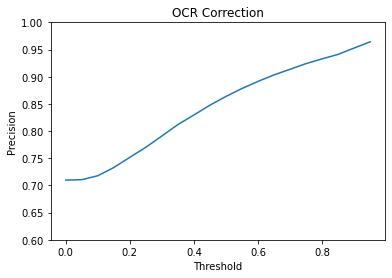

In [97]:
plt.plot(x,y)
plt.title('OCR Correction')
plt.ylim(0.6,1)
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

In [96]:
list(zip(nums, y, x))

[((15465, 21788), 0.7097943822287498, 0.0),
 ((15465, 21764), 0.7105770997978312, 0.05),
 ((15455, 21529), 0.7178689209902922, 0.1),
 ((15433, 21055), 0.7329850391830919, 0.15000000000000002),
 ((15390, 20471), 0.7517952225098921, 0.2),
 ((15307, 19873), 0.7702410305439541, 0.25),
 ((15214, 19234), 0.7909951128210461, 0.30000000000000004),
 ((15081, 18573), 0.8119851397189468, 0.35000000000000003),
 ((14941, 18008), 0.8296868058640604, 0.4),
 ((14797, 17456), 0.8476741521539871, 0.45),
 ((14616, 16921), 0.8637787364812954, 0.5),
 ((14399, 16393), 0.8783627157933264, 0.55),
 ((14197, 15927), 0.8913794185973504, 0.6000000000000001),
 ((13955, 15448), 0.9033531848783014, 0.65),
 ((13726, 15023), 0.9136657125740532, 0.7000000000000001),
 ((13495, 14603), 0.924125179757584, 0.75),
 ((13216, 14167), 0.9328721677137009, 0.8),
 ((12834, 13637), 0.9411160812495417, 0.8500000000000001),
 ((12290, 12899), 0.9527870377548647, 0.9),
 ((11386, 11809), 0.9641798628164959, 0.9500000000000001)]

In [130]:
df

,hid,sent,corr,gen,score,match
0,uiuo.ark+=13960=t1jh42q99,Come with me -- you shall see it ; '' and Mari...,<blank>,<blank>,0.999138,True
1,uc2.ark+=13960=t9r20tq61,"The parish had been a college living , and its...",<blank>,<blank>,0.998571,True
2,uc2.ark+=13960=t3zs2vk6v,Having before my ej'es the uncomfortable prosp...,<blank>,<blank>,0.998369,True
3,nc01.ark+=13960=t3vt28h89,"He spent three tedious , discouraging days in ...",the,the,0.998301,True
4,uc2.ark+=13960=t2c825v7x,fondly believed <ocr> d </ocr> that she would ...,<blank>,<blank>,0.998963,True
...,...,...,...,...,...,...
21783,uc2.ark+=13960=t3zs2vk6v,This horn- he shall be free -- [ Exit Dunbar ....,Scene,SEXE,0.491575,False
21784,uc1.b3322643,You have never had cause to shrink from what i...,'','',0.940410,True
21785,loc.ark+=13960=t89g5zd3x,Sipes and Saunders worked faithfully for sever...,<blank>,<blank>,0.998749,True
21786,nyp.33433074875513,`` Now what the deuce can be the meaning of th...,? '',? '',0.841173,True


In [143]:
x = []
y = []
for book_id in all_ids:
    book_data = df[df['hid']==book_id]
    cutoff_df = book_data[book_data['score'] > 0.7]
    y.append(len(cutoff_df) - len(cutoff_df[cutoff_df['match']]))
    x.append(len(cutoff_df[cutoff_df['match']]))

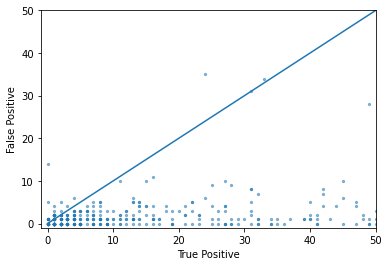

In [150]:
plt.xlabel('True Positive')
plt.ylabel('False Positive')
plt.xlim(-1, 50)
plt.ylim(-1, 50)
plt.plot([0,100],[0,100])
plt.scatter(x,y,s=5,alpha=0.5)